In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cargo el Data Set 
df= pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/segundo año/cuarto/AA2/IEFI/datos_IEFI.csv')
df

,x,y
0,0.126599,3.773421
1,1.491460,1.577460
2,-1.749485,12.574612
3,-0.389503,4.101987
4,-1.089598,1.003658
...,...,...
195,2.443874,1.904677
196,-1.687218,9.615821
197,-0.695371,2.712330
198,1.025503,0.610035


In [3]:
# Ejecuto describe() para obtener informacion sobre mi DataSet, principalmente su promedio y desviacion estandar
df.describe()

,x,y
count,200.000000,200.000000
mean,0.434113,2.472783
std,1.378263,2.583191
min,-1.749485,-7.759211
25%,-0.841021,1.119532
50%,0.635503,2.273313
75%,1.613222,3.584773
max,2.737953,12.574612


In [4]:
# Separo en x e y
x= df.drop('y',axis=1)
y=df[['y']]

### Regresion lineal simple

In [5]:
# Creo mi modelo de regresion lineal
from sklearn.linear_model import LinearRegression
regresion= LinearRegression(fit_intercept=True)

In [6]:
# Calculo mi learning_curve, pasandole el modelo creado anteriormente, mis features (x), mi target, el train size, que seria una lista 
# con los tamaños de mi Set de datos correspondiente a mi train, la cantidad de folds, y el score que en este caso utilizaremos
# neg_root_mean_squared_error
from sklearn.model_selection import learning_curve
tamanos_train=np.linspace(0.05, 1.0, 20)

train_sizes, train_scores, test_scores = learning_curve(
    regresion, 
    x, 
    y, 
    train_sizes=tamanos_train, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    shuffle=True)
'''
 learning_curve nos devuelve tres arrays, uno llamado train_sizes_abs que es el tamaño que tomó el train en cada caso. Luego está
 train_scores que es el score  que nos trae por cada tamaño de train_size nos trae el score correspondiente a cada fold en el train, 
 y sucede lo mismo en test_scores, solo que con los datos correspondientes al test.

 Como test_scores y train_scores nos trae una lista de listas con los valores de cada fold, promediamos los resultados, así 
 generando un array con la dimension igual que nuestro train_sizes_abs, lo multiplicamos a ambos por -1 ya que estàn en valores negativos
'''
mean_train_scores = -1*np.mean(train_scores, axis=1)
mean_test_scores = -1*np.mean(test_scores, axis=1)
# Luego creamos un DataFrame para graficarlo con los datos obtenidos
df_curvas=pd.DataFrame()
df_curvas['observaciones'] = train_sizes
df_curvas['train_RMSE'] = mean_train_scores
df_curvas['test_RMSE'] = mean_test_scores
df_curvas

,observaciones,train_RMSE,test_RMSE
0,8,1.762406,2.515139
1,16,1.709898,2.367363
2,24,1.989288,2.407259
3,32,1.985685,2.321095
4,40,2.135275,2.219769
5,48,2.141639,2.216244
6,56,2.139000,2.198318
7,63,2.214286,2.173935
8,72,2.203350,2.170714
9,79,2.208291,2.164854


Text(0, 0.5, 'Error')

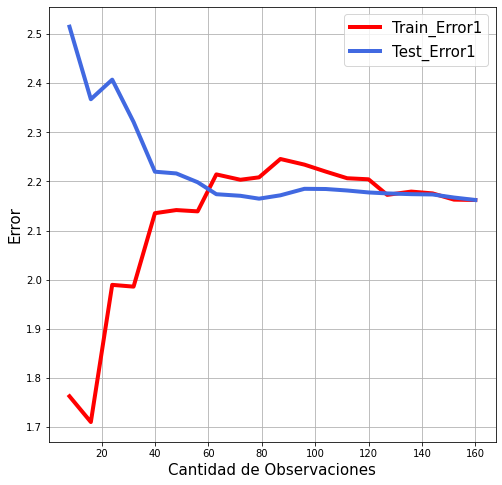

In [7]:
# Graficamos
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

axes.plot(df_curvas['observaciones'],df_curvas['train_RMSE'], "red",  linewidth=4,label="Train_Error1")
axes.plot(df_curvas['observaciones'],df_curvas['test_RMSE'], "royalblue",  linewidth=4, label="Test_Error1")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)

### Regresion lineal con mas exponentes

In [8]:
# Con PolynomialFeatures lo que generamos es agregarle mas grados de libertad al modelo, agregando potencias de x
from sklearn.preprocessing import PolynomialFeatures
potencia=10
poly = PolynomialFeatures(potencia, include_bias=False)
X_poly=poly.fit_transform(x)

In [9]:
# mismo proceso que antes pero en vez de pasarle x le pasaremos X_poly
curvas_aprendizaje15=learning_curve(regresion, X_poly, y, 
                                  train_sizes=tamanos_train, 
                                  cv=5,
                                  scoring='neg_root_mean_squared_error',
                                  shuffle=True)
train_scores15 = -1*np.mean(curvas_aprendizaje15[1], axis=1)
test_scores15 = -1*np.mean(curvas_aprendizaje15[2], axis=1)

df_learning_curves15 = pd.DataFrame()
df_learning_curves15['observaciones'] = train_sizes
df_learning_curves15['train_RMSE'] = train_scores15
df_learning_curves15['test_RMSE'] = test_scores15

df_learning_curves15

,observaciones,train_RMSE,test_RMSE
0,8,7.920557e-13,843.058193
1,16,2.209767e-01,2.097652
2,24,3.986181e-01,0.925329
3,32,4.213589e-01,0.725793
4,40,4.513306e-01,0.707966
5,48,4.711962e-01,0.656713
6,56,4.614280e-01,0.637007
7,63,4.637576e-01,0.616754
8,72,4.655764e-01,0.565265
9,79,4.740068e-01,0.539697


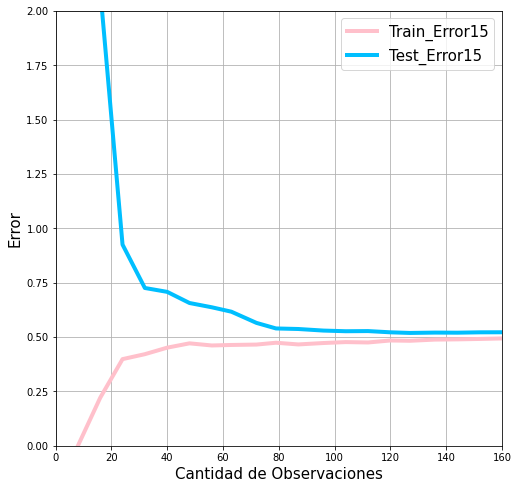

In [10]:
# Grafico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

axes.plot(df_learning_curves15['observaciones'],df_learning_curves15['train_RMSE'], "pink", linewidth=4, label="Train_Error15")
axes.plot(df_learning_curves15['observaciones'],df_learning_curves15['test_RMSE'], "deepskyblue", linewidth=4, label="Test_Error15")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)

axes.set_ylim(0, 2);
axes.set_xlim(0, 160);

### Ensamble

In [74]:
# importo y creo los modelos a usar
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
regresion_lineal=LinearRegression()
svr= SVR()
knn= KNeighborsRegressor()
arbol=DecisionTreeRegressor()
sgd= SGDRegressor()
lasso = Lasso()
ridge=  Ridge()

In [75]:
# Genero mi ensamble, pasandole una lista de tuplas con los modelos
from sklearn.ensemble import VotingRegressor
modelos=[('regresion_lineal',regresion_lineal),('svr',svr),('knn',knn),('arbol',arbol),('sgd',sgd),('lasso',lasso),('ridge',ridge)]
ensemble=VotingRegressor(estimators=modelos,n_jobs=-1)

In [86]:
# Genero los hiperparametros para cada modelo
hiperparametros={}

In [87]:
hiperparametros['svr__C']=[1e-1,1,1e1]
hiperparametros['knn__n_neighbors']=[5,15,20]
hiperparametros['arbol__max_depth']=[5,10,15,20]
hiperparametros['sgd__penalty']= ['l1','l2']
hiperparametros['lasso__alpha']=[5,10,15]
hiperparametros['ridge__alpha']=[5,10,15]

In [88]:
hiperparametros

{'svr__C': [0.1, 1, 10.0],
 'knn__n_neighbors': [5, 15, 20],
 'arbol__max_depth': [5, 10, 15, 20],
 'sgd__penalty': ['l1', 'l2'],
 'lasso__alpha': [5, 10, 15],
 'ridge__alpha': [5, 10, 15]}

In [89]:
# con CV busco mi mejores hiperparametros para cada modelo
from sklearn.model_selection import GridSearchCV
grid_ensemble= GridSearchCV(estimator=ensemble, param_grid=hiperparametros,scoring=['r2','neg_root_mean_squared_error'], cv=5,n_jobs=-1, return_train_score=True,verbose=True,refit='r2')

In [90]:
df_x= pd.DataFrame(X_poly)

In [91]:
grid_ensemble.fit(df_x, y)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('regresion_lineal',
                                                    LinearRegression()),
                                                   ('svr', SVR()),
                                                   ('knn',
                                                    KNeighborsRegressor()),
                                                   ('arbol',
                                                    DecisionTreeRegressor()),
                                                   ('sgd', SGDRegressor()),
                                                   ('lasso', Lasso()),
                                                   ('ridge', Ridge())],
                                       n_jobs=-1),
             n_jobs=-1,
             param_grid={'arbol__max_depth': [5, 10, 15, 20],
                         'knn__n_neighbors': [5, 15, 20],
                         'lasso__alpha': [5, 10, 15],
                         'r

In [92]:
# Mejores Hiperparametros 
grid_ensemble.best_params_

{'arbol__max_depth': 20,
 'knn__n_neighbors': 5,
 'lasso__alpha': 5,
 'ridge__alpha': 5,
 'sgd__penalty': 'l1',
 'svr__C': 10.0}

In [93]:
# RMSE Final con 3 desvios 
grid_ensemble.best_score_

-2.0042465307937458e+29

Para mejorar el rendimiento de los modelos, solo queda mejorar la busqueda de hiperparametros